6. On your local machine (or on AWS outside of Spark) in python, read the CSV data from the S3 folder into a pandas DataFrame (You will have to research how to read data into pandas from S3 buckets). Note You must have first authenticated on your machine using aws configure on the command line to complete this step).

In [ ]:
# ===============================
# Setup
# ===============================
# Make sure you have these installed:
# pip install pandas boto3 s3fs

import boto3
import pandas as pd
import os
import sys

# -------------------------------
# Step 1: Define your S3 details
# -------------------------------
BUCKET_NAME = "akarnik-bstn-bucket"       # 🔹 Bucket
OBJECT_KEY = "ngrams_filtered.csv"     # 🔹 File- same file as Bigdata_token
LOCAL_FILE = "ngrams_filtered_local.csv"     # Local name for caching-same file as Bigdata_token_local

s3 = boto3.client("s3")

# -------------------------------
# Step 2: Check if file exists in S3
# -------------------------------
try:
    s3.head_object(Bucket=BUCKET_NAME, Key=OBJECT_KEY)
    print(f"✅ Found {OBJECT_KEY} in bucket {BUCKET_NAME}")
except Exception as e:
    print(f"❌ File not found in S3: {e}")
    sys.exit(1)

# -------------------------------
# Step 3: Download only if not local
# -------------------------------
if not os.path.exists(LOCAL_FILE):
    print(f"⬇️ Downloading {OBJECT_KEY} from S3...")
    s3.download_file(BUCKET_NAME, OBJECT_KEY, LOCAL_FILE)
    print("✅ Download complete")
else:
    print(f"📂 Using cached local file: {LOCAL_FILE}")

# -------------------------------
# Step 4: Load into pandas
# -------------------------------
df = pd.read_csv(LOCAL_FILE)

print("✅ Data loaded successfully!")
print(df.head())
print(df.info())


✅ Found ngrams_filtered.csv in bucket akarnik-bstn-bucket
📂 Using cached local file: ngrams_filtered_local.csv
✅ Data loaded successfully!
   token  year  frequency  pages  books
0  token  year  frequency  pages  books
1   data  1584         16     14      1
2   data  1614          3      2      1
3   data  1627          1      1      1
4   data  1631         22     18      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      317 non-null    object
 1   year       317 non-null    object
 2   frequency  317 non-null    object
 3   pages      317 non-null    object
 4   books      317 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB
None


In [19]:
df.head()

,token,year,frequency,pages,books
0,token,year,frequency,pages,books
1,data,1584,16,14,1
2,data,1614,3,2,1
3,data,1627,1,1,1
4,data,1631,22,18,1


In [20]:
df = df.iloc[1:].reset_index(drop=True)


In [21]:
df

,token,year,frequency,pages,books
0,data,1584,16,14,1
1,data,1614,3,2,1
2,data,1627,1,1,1
3,data,1631,22,18,1
4,data,1637,1,1,1
...,...,...,...,...,...
311,data,2004,201841,93539,3483
312,data,2005,197467,88901,3392
313,data,2006,203669,92960,3449
314,data,2007,168338,78986,3246


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   token      316 non-null    object
 1   year       316 non-null    object
 2   frequency  316 non-null    object
 3   pages      316 non-null    object
 4   books      316 non-null    object
dtypes: object(5)
memory usage: 12.5+ KB


In [23]:
df.describe()

,token,year,frequency,pages,books
count,316,316,316,316,316
unique,1,316,254,249,233
top,data,1584,1,1,1
freq,316,1,25,25,33


In [24]:
df.shape

(316, 5)

7. Plot the number of occurrences of the token (the frequency column) of data over the years using matplotlib.

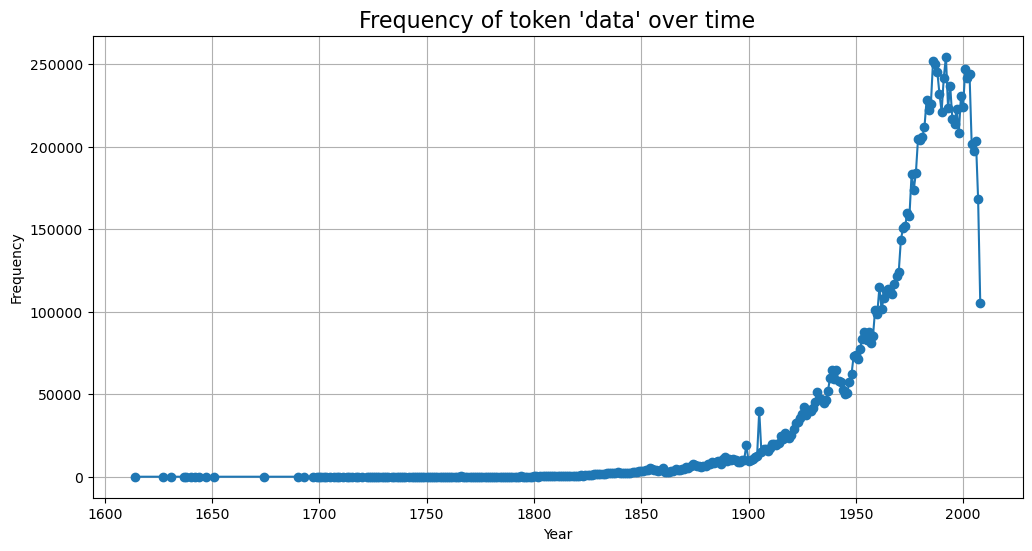

In [25]:
import matplotlib.pyplot as plt

# Ensure 'year' and 'frequency' are numeric
yearly_clean = yearly[yearly["year"].str.isdigit()].copy()
yearly_clean["year"] = yearly_clean["year"].astype(int)
yearly_clean["frequency"] = yearly_clean["frequency"].astype(int)

plt.figure(figsize=(12,6))
plt.plot(yearly_clean["year"], yearly_clean["frequency"], marker="o", linestyle="-")
plt.title("Frequency of token 'data' over time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
